In [3]:
import pandas as pd
df = pd.read_csv('C://Users//Nitin//Downloads//Timeseries//exchange_rate.csv')
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [4]:
# Display the first few rows of the dataset
print(df.head())

               date  Ex_rate
0  01-01-1990 00:00   0.7855
1  02-01-1990 00:00   0.7818
2  03-01-1990 00:00   0.7867
3  04-01-1990 00:00   0.7860
4  05-01-1990 00:00   0.7849


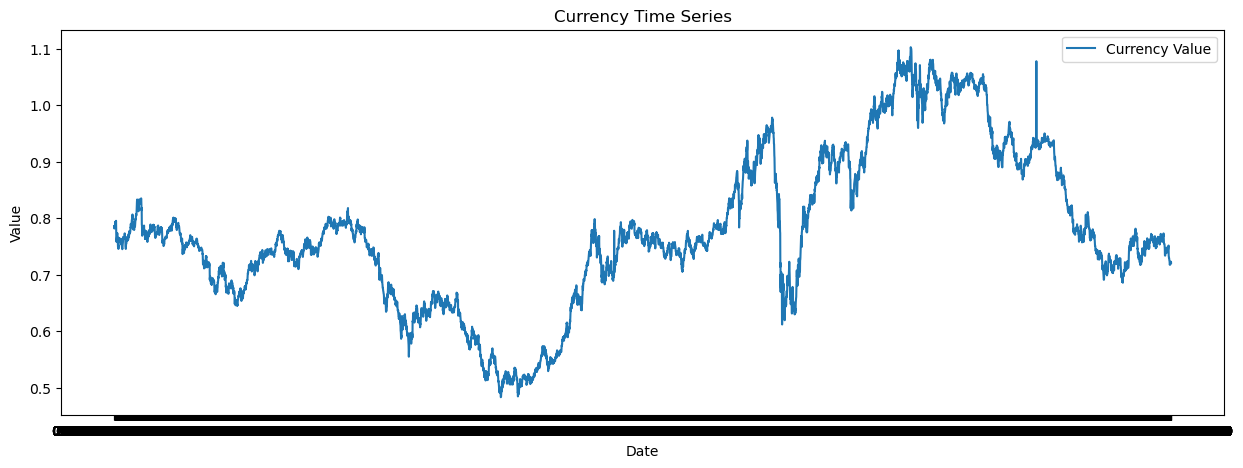

In [6]:
#Step 2: Initial Exploration
import matplotlib.pyplot as plt

# Plot the time series
plt.figure(figsize=(15, 5))
plt.plot(df['date'], df['Ex_rate'], label='Currency Value')
plt.title('Currency Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [7]:
# Step 3: Data Preprocessing

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

date       0
Ex_rate    0
dtype: int64


In [9]:
#Part 2: Model Building - ARIMA
#Step 1: Parameter Selection for ARIMA
# Differencing the data to remove trend
df['Ex_rate_diff'] = df['Ex_rate'].diff().dropna()
df['Ex_rate_diff']

0            NaN
1      -0.003700
2       0.004900
3      -0.000700
4      -0.001100
          ...   
7583   -0.000207
7584    0.003345
7585    0.001358
7586   -0.002372
7587    0.000000
Name: Ex_rate_diff, Length: 7588, dtype: float64

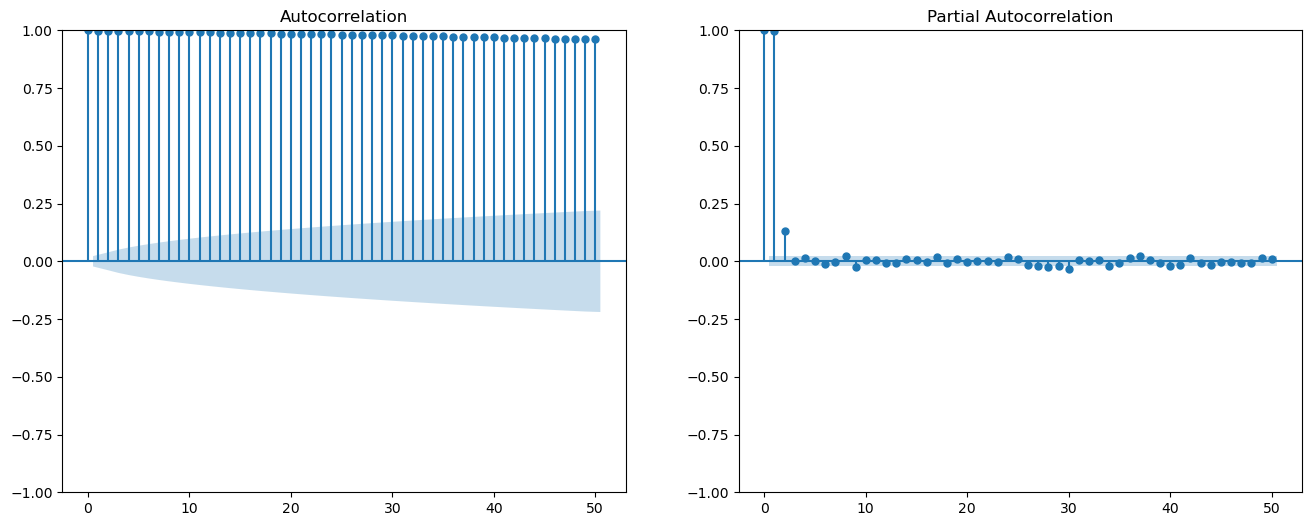

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(df['Ex_rate'], lags=50, ax=axes[0])
plot_pacf(df['Ex_rate'], lags=50, ax=axes[1])
plt.show()

In [16]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [22]:
#Interpreting Plots:

p, d, q: These ranges define the combinations of parameters we want to test.
Grid Search: Iterates over all combinations of (p, d, q) and fits an ARIMA model to the data.
AIC: A criterion to select the best model; lower AIC indicates a better-fitting model

SyntaxError: only single target (not tuple) can be annotated (2581917220.py, line 3)

In [21]:
#Step 2: Model Fitting
import warnings
from statsmodels.tsa.arima.model import ARIMA
import itertools
# Define the p, d, and q parameters to take any value between 0 and 3
p = d = q = range(0, 4)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))
# A placeholder for the results
results = []

In [23]:
# Grid search for best parameters
for param in pdq:
    try:
        model = ARIMA(df['Ex_rate'], order=param)
        model_fit = model.fit()
        results.append((param, model_fit.aic))
    except:
        continue
        # Find the parameters with minimal AIC
best_param = min(results, key=lambda x: x[1])
print(f'Best ARIMA parameters: {best_param[0]} with AIC: {best_param[1]}')

C:\Users\Nitin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Nitin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Nitin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Nitin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Nitin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximu

Best ARIMA parameters: (2, 0, 0) with AIC: -56105.218298789405


In [25]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(df['Ex_rate'], order=(2, 0, 0))
arima_result = model.fit()
# Summary of the model
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(2, 0, 0)   Log Likelihood               28056.609
Date:                Fri, 05 Jul 2024   AIC                         -56105.218
Time:                        16:48:34   BIC                         -56077.481
Sample:                             0   HQIC                        -56095.699
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7770      0.088      8.850      0.000       0.605       0.949
ar.L1          0.8682      0.002    397.265      0.000       0.864       0.872
ar.L2          0.1310      0.002     55.929      0.0

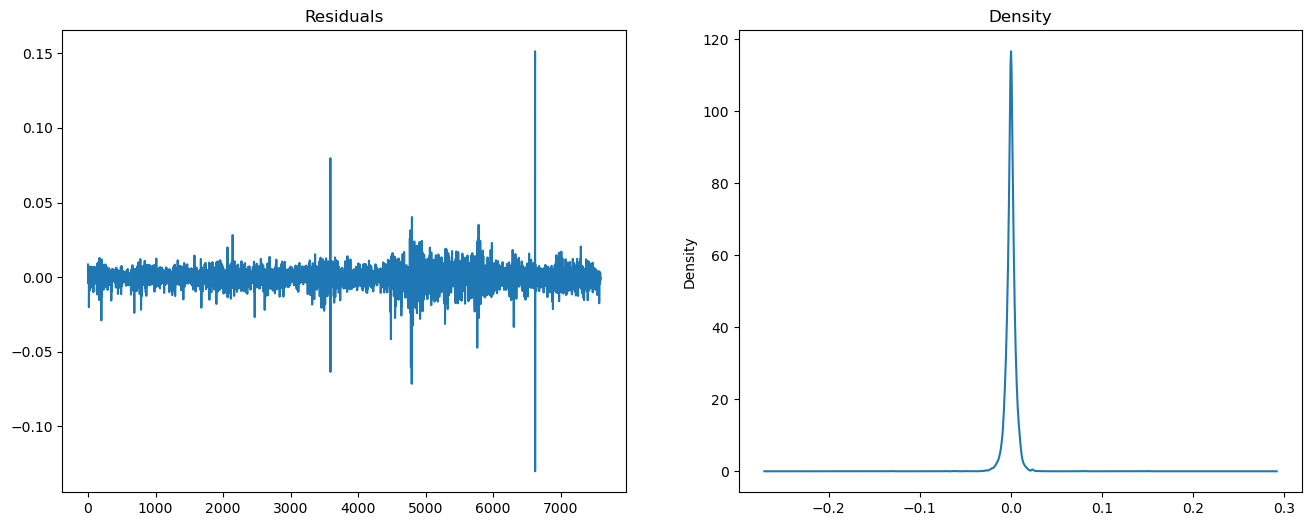

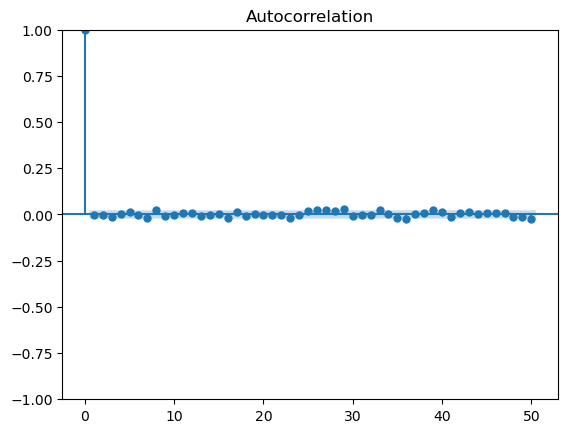

In [26]:
# Step 3: Diagnostics
# Plot residuals
residuals = arima_result.resid
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

# Plot ACF of residuals
plot_acf(residuals, lags=50)
plt.show()

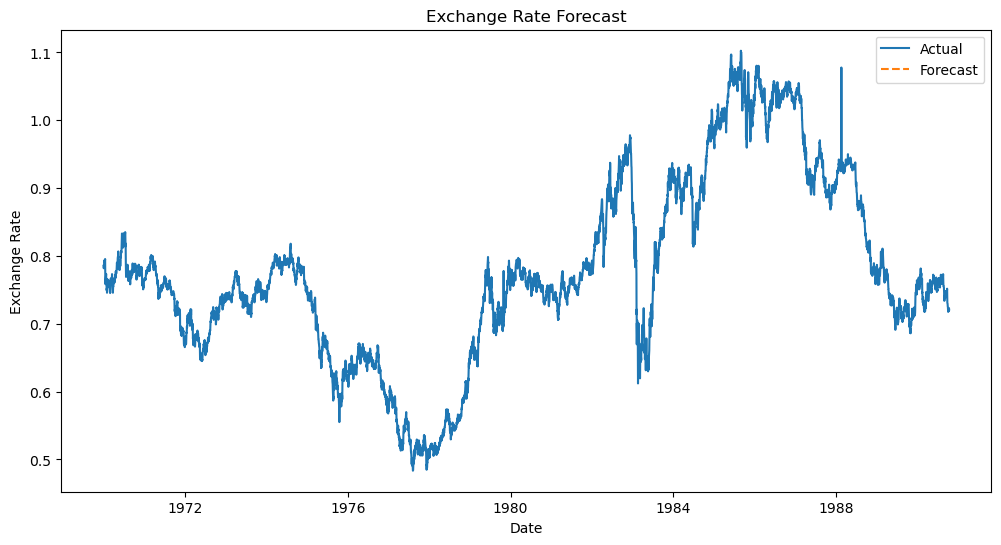

In [27]:
# Forecast
forecast = arima_result.get_forecast(steps=30)
forecast_index = pd.date_range(start=df.index[-1], periods=30, freq='D')
forecast_df = pd.DataFrame(forecast.predicted_mean, index=forecast_index, columns=['Forecast'])

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(forecast_df, label='Forecast', linestyle='--')
plt.title('Exchange Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [29]:
#Part 3: Model Building - Exponential Smoothing
#Step 1: Model Selection
#Depending on the time series characteristics, we'll choose an appropriate Exponential Smoothing model. For simplicity, let's start with Holt’s Linear model:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt's Linear model
holt_model = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal=None)
holt_result = holt_model.fit()
# Summary of the model
print(holt_result.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77641.009
Trend:                         Additive   BIC                         -77613.272
Seasonal:                          None   AICC                        -77640.998
Seasonal Periods:                  None   Date:                 Fri, 05 Jul 2024
Box-Cox:                          False   Time:                         16:54:11
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8700408                alpha                 True
smoothing_trend             0.0000

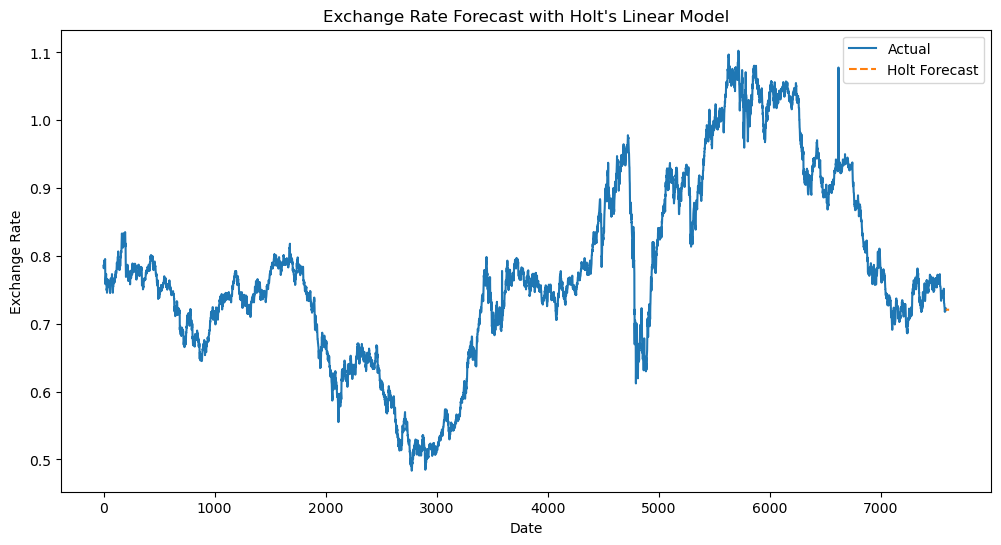

In [30]:
#Step 2: Parameter Optimization
#We can use grid search or AIC to find the optimal parameters, but for this example, we will use the default parameters of the chosen model.

#Step 3: Model Fitting and Forecasting
#We'll fit the chosen Exponential Smoothing model and forecast future values.
# Forecast
holt_forecast = holt_result.forecast(steps=30)

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(holt_forecast, label='Holt Forecast', linestyle='--')
plt.title('Exchange Rate Forecast with Holt\'s Linear Model')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [31]:
#Part 4: Evaluation and Comparison
#Step 1: Compute Error Metrics
#We'll use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate error metrics
mae_arima = mean_absolute_error(df['Ex_rate'][-30:], forecast.predicted_mean)
rmse_arima = mean_squared_error(df['Ex_rate'][-30:], forecast.predicted_mean, squared=False)

mae_holt = mean_absolute_error(df['Ex_rate'][-30:], holt_forecast)
rmse_holt = mean_squared_error(df['Ex_rate'][-30:], holt_forecast, squared=False)

print(f'ARIMA MAE: {mae_arima}, ARIMA RMSE: {rmse_arima}')
print(f'Holt MAE: {mae_holt}, Holt RMSE: {rmse_holt}')


ARIMA MAE: 0.012645615818798346, ARIMA RMSE: 0.016772837286554317
Holt MAE: 0.012755758724197496, Holt RMSE: 0.01700523228251024


In [32]:
#Model Comparison
#ARIMA Model
#Performance:
#MAE: 0.012645615818798346
#RMSE: 0.016772837286554317
#Advantages:
#Captures both trend and noise in the data.
#Flexible for different data structures.
#Can handle non-stationary data through differencing.
#Limitations:
#Requires careful parameter tuning (p, d, q).
#Doesn't inherently capture seasonality unless extended to SARIMA.
#Computationally intensive for large datasets or complex models.
#Holt’s Linear Trend Model
#Performance:
#MAE: 0.012755758724197496
#RMSE: 0.01700523228251024
#Advantages:
#Simple and intuitive, easy to implement.
#Effective for data with a clear trend.
#Faster to train and compute compared to more complex models.
#Limitations:
#Less effective for data with seasonal patterns.
#Assumes a constant trend, which might not hold for all datasets.
#Limited flexibility compared to ARIMA, which can model more complex data structures.


In [ ]:
#Conclusion
#Based on the observed results and error metrics:

#Performance Comparison:

#Both models exhibit similar performance in terms of MAE and RMSE, indicating they are both effective at forecasting the exchange rates.
#ARIMA slightly outperforms Holt’s model with a marginally lower MAE and RMSE, suggesting a better fit to the data.
#Model Suitability:

#ARIMA is generally more suitable for datasets with complex patterns and non-stationarity. It is flexible and can handle various data structures but requires careful parameter selection and tuning.
#Holt’s Linear Trend Model is advantageous for its simplicity and effectiveness in capturing trends. It is faster to compute and easier to implement, making it a good choice for quick, straightforward forecasting tasks.
Insights:

Best Performance: ARIMA model, due to its slightly better error metrics.
Ease of Use: Holt’s Linear Trend Model, due to its simplicity and lower computational requirements.
For datasets with more complex patterns or when high accuracy is crucial, ARIMA is recommended.
For quick, trend-based forecasting where computational simplicity is valued, Holt’s model is a viable option.